In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import functools
import operator
import time

#用pandas讀取csv檔轉成Dataframe
df_cords=pd.read_csv(r"C:\Users\user\Desktop\cords.csv", encoding="big5")
df_vehicless=pd.read_csv(r"C:\Users\user\Desktop\demand.csv", encoding="big5", header=None)

#捨去需求行，並將原點去除，而後轉為矩陣(numpy)
cords=df_cords.to_numpy()
cordsd=df_cords.drop('d',axis=1)
cordsd=cordsd.drop(0).to_numpy()

#定義原點位置
depot=df_cords.loc[0].drop('d',axis=0)
depotcor=depot.to_numpy()

custs=df_cords.drop(0).to_numpy()
vehicles=df_vehicless.to_numpy()

row_rand_2=[]
row_rand=[]
vehgroupcords=[]
vehgroup=[]
sub=[]
d = 0

def distance(x1,x2,y1,y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

#計算有多少顧客
custs_array = np.arange(custs.shape[0])
def rand(custs, cordsd):
    global row_rand,row_rand_2
    #隨機挑選顧客
    np.random.shuffle(custs_array)

    #取出當中顧客的位置
    row_rand = custs[custs_array[0:40]]
    row_rand_2 = cordsd[custs_array[0:40]]
    return row_rand, row_rand_2

#為每台車找出容量的使用情況
def subtourslice(row_rand,vehicles):
    capacityused = np.zeros(len(vehicles))
    vehgroup.clear()
    k = 0
    #客戶數
    
    #每台車載完客戶後的最大容量
    mass = []
    for i in range(len(vehicles)):
        while capacityused[i] < vehicles[i][1] and k <= (len(row_rand) - 1):
            #各點的項加總
            capacityused[i] = capacityused[i] + row_rand[k][2]
            #print("capacityused",capacityused[i])
            #若超過容量的限制(每台140)，則減去上一個各戶容量
            if capacityused[i] >= vehicles[i][1]:
                capacityused[i] = capacityused[i] - row_rand[k][2]
                k = k - 1
                #這台車的客戶數
                vehgroup.append(k)
                k = k + 1
                break
            k = k + 1
        mass.append(capacityused[i])
    vehgroup.append(k - 1)
    return vehgroup,mass

def subtour(vehgroup,row_rand,row_rand_2):
    global vehgroupcords
    vehgroupcords.clear()
    sub.clear()
    sub.append(row_rand[:(vehgroup[0]+1)])
    vehgroupcords.append(row_rand_2[:(vehgroup[0]+1)])
    for i in range(0,len(vehgroup)-1):
        sub.append(row_rand[(vehgroup[i]+1):(vehgroup[i+1]+1)])
        vehgroupcords.append(row_rand_2[(vehgroup[i]+1):(vehgroup[i+1]+1)])
    return sub, vehgroupcords

#計算車輛行走距離
def totaltourdistance(sub):
    global d
    d=0
    for j in range(len(sub)-1):
        x1=depot[0]
        y1=depot[1]
        x2=sub[j][0][0]
        y2=sub[j][0][1]
        d=d+distance(x1,x2,y1,y2)
        for i in range(len(sub[j])-1):
            x1=sub[j][i][0]
            y1=sub[j][i][1]
            x2=sub[j][i+1][0]
            y2=sub[j][i+1][1]
            d=d+distance(x1,x2,y1,y2)
        x1=sub[j][-1][0]
        y1=sub[j][-1][1]
        x2=depot[0]
        y2=depot[1]
        d=d+distance(x1,x2,y1,y2)
    return d


# #各車能負荷的顧客人數與使用的容量大小
# u=subtourslice(row_rand,vehicles) #return vehgroup, mass
# #各車服務到的顧客
# v=subtour(u[0],row_rand,row_rand_2) #return sub, vehgroupcords
# #五台車的距離加總
# total=allvehicledistance(v) #return alldistance

xc=[]
yc=[]
xd=[depotcor[0]]
yd=[depotcor[1]]
col=['b','g','r','c','m']
def plot(xc,yc,xd,yd,vehgroupcords):
    global sub
    for i in range(len(vehgroupcords)):
        xc=np.transpose(vehgroupcords[i])[0]
        yc=np.transpose(vehgroupcords[i])[1]        
        plt.scatter(xd,yd,c='k')
        plt.scatter([xc[0]],[yc[0]],c='k')
        plt.plot([xd,[xc[0]]],[yd,[yc[0]]],col[i])
        plt.scatter(xc,yc,c='k')
        plt.plot(xc,yc,col[i])
        plt.scatter([[xc[-1]],xd],[[yc[-1]],yd],c='k')
        plt.plot([[xc[-1]],xd],[[yc[-1]],yd],col[i])
        
        xc=[]
        yc=[]
    plt.show()

In [2]:
vehgroup=[]
init_vehgroupcords=[]
veh1=[30,40]

init_sub=[]
init_sol=[]
total=0

tour=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]

def subtourslice1(tour,vehicles):
    capacityused=np.zeros(len(vehicles))
    k=0
    mass=[]
    for i in range(len(vehicles)):
        while capacityused[i]<vehicles[i][1] and k<=(len(tour)-1):
            capacityused[i]=capacityused[i]+custs[tour[k]-1][2]
            if capacityused[i]>=vehicles[i][1]:
                capacityused[i]=capacityused[i]-custs[tour[k]-1][2]
                k=k-1
                vehgroup.append(k)
                k=k+1
                break
            k=k+1
        mass.append(capacityused[i])
    vehgroup.append(k-1)
    return vehgroup,mass

def subtour1(vehgroup,tour):
    init_sub.append(tour[:(vehgroup[0]+1)])
    init_vehgroupcords.append(cordsd[:(vehgroup[0]+1)])
    for i in range(0,len(vehgroup)-1):
        init_sub.append(tour[(vehgroup[i]+1):(vehgroup[i+1]+1)])
        init_vehgroupcords.append(cordsd[(vehgroup[i]+1):(vehgroup[i+1]+1)])
    return init_sub, init_vehgroupcords

def get_init_sol1(init_sub):
    for i in range(len(init_sub)):
        init_sol.extend(init_sub[i])
        init_sol.append(0)
    #print(init_sol)
    return init_sol

def new_coords1(new_sub):
    global new_coord
    new_coord=[[],[],[],[],[]]
    for i in range(len(new_sub)):
        for j in (new_sub[i]):
            new_coord[i].append(cordsd[j-1])
    return new_coord

def total_distance1(new_coord):
    global d
    d=0
    for i in range(len(new_coord)):
        x1=depotcor[0]
        y1=depotcor[1]
        x2=new_coord[i][0][0]
        y2=new_coord[i][0][1]
        d=d+distance(x1,x2,y1,y2)
        for j in range(len(new_coord[i])-1):
            x1=new_coord[i][j][0]
            y1=new_coord[i][j][1]
            x2=new_coord[i][j+1][0]
            y2=new_coord[i][j+1][1]
            d=d+distance(x1,x2,y1,y2)
        x1=new_coord[i][-1][0]
        y1=new_coord[i][-1][1]
        x2=depotcor[0]
        y2=depotcor[1]
        d=d+distance(x1,x2,y1,y2)
    return d



SA

In [3]:
def SA_main():
    
    global init_sub, fin_sol, init_sol, init_obj, new_sol, new_obj, new_sub, fin_sub, fin_obj
    
    tStart = time.time()
    T = 100  #initiate temperature
    Tmin = 10  #minimum value of terperature
    Tk = T
    alpha=0.9
    K=10
    N=10

    
    init_sol = rand(custs, cordsd)[1]
    init_obj = totaltourdistance(subtour(subtourslice(row_rand,vehicles)[0],row_rand,row_rand_2)[0])
    fin_sol = init_sol
    fin_sub = init_sub
    fin_obj = init_obj
    print("初始解：",init_obj)
    while Tk > Tmin:
        for k in range(K):
            for n in range(N):
                new_sol = rand(custs, cordsd)[1]
                new_sub = subtour(subtourslice(row_rand,vehicles)[0],row_rand,row_rand_2)[1]
                new_obj = totaltourdistance(subtour(subtourslice(row_rand,vehicles)[0],row_rand,row_rand_2)[0])
                if  new_obj <= init_obj:
                    init_sol = new_sol
                    init_sub = new_sub[:]
                    init_obj = new_obj

                else:
                    p = np.exp(-((new_obj - init_obj)/Tk))
                    if np.random.rand() <= p:
                        init_sol = new_sol
                        init_obj = new_obj
                        init_sub = new_sub[:]

                    else:
                        init_sol = init_sol
                        init_obj = init_obj
                        init_sub = init_sub
                if init_obj <= fin_obj:
                    fin_sol = init_sol
                    fin_sub = init_sub
                    fin_obj = init_obj
                    
        Tk = alpha * Tk
    plot(xc,yc,xd,yd,fin_sub)
    tEnd = time.time()
    print("最終解:", fin_obj)
    print("用時:", tEnd - tStart)
    
    

初始解： 1192.322999008106


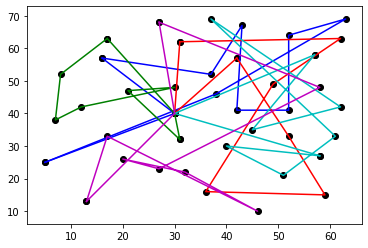

最終解: 780.8464696373005
用時: 1.1060612201690674


In [4]:
SA_main()

In [3]:
def SA_main():
    
    global init_sub, fin_sol, init_sol, init_obj, new_sol, new_obj, new_sub, fin_sub, fin_obj
    
    tStart = time.time()
    T = 100  #initiate temperature
    Tmin = 10  #minimum value of terperature
    Tk = T
    alpha=0.9
    K=10
    N=10

    
    init_sol = get_init_sol1(subtour1(subtourslice1(tour,vehicles)[0],tour)[0])
    init_obj = total_distance1(new_coords1(init_sub))
    fin_sol = init_sol
    fin_sub = init_sub
    fin_obj = init_obj
    print("初始解：",init_obj)
    while Tk > Tmin:
        for k in range(K):
            for n in range(N):
                new_sol = rand(custs, cordsd)[1]
                new_sub = subtour(subtourslice(row_rand,vehicles)[0],row_rand,row_rand_2)[1]
                new_obj = totaltourdistance(subtour(subtourslice(row_rand,vehicles)[0],row_rand,row_rand_2)[0])
                if  new_obj <= init_obj:
                    init_sol = new_sol
                    init_sub = new_sub[:]
                    init_obj = new_obj

                else:
                    p = np.exp(-((new_obj - init_obj)/Tk))
                    if np.random.rand() <= p:
                        init_sol = new_sol
                        init_obj = new_obj
                        init_sub = new_sub[:]

                    else:
                        init_sol = init_sol
                        init_obj = init_obj
                        init_sub = init_sub
                if init_obj <= fin_obj:
                    fin_sol = init_sol
                    fin_sub = init_sub
                    fin_obj = init_obj
                    
        Tk = alpha * Tk
    plot(xc,yc,xd,yd,fin_sub)
    tEnd = time.time()
    print("最終解:", fin_obj)
    print("用時:", tEnd - tStart)
    
    

In [5]:
totaltourdistance(fin_sub)

845.5928271176366

初始解： 1100.493434097161
992.2702774567362 1100.493434097161
1100.3789025920898 992.2702774567362
1249.5815421764353 992.2702774567362
1134.1568206582112 992.2702774567362
967.240219137355 1134.1568206582112
1039.1823489492808 967.240219137355
952.1372367993289 967.240219137355
1061.1352589445269 952.1372367993289
1249.9430953577228 1061.1352589445269
944.1324073534762 1061.1352589445269
1160.1223529877552 944.1324073534762
1154.6985345779117 944.1324073534762
934.1191873549806 944.1324073534762
1079.340623695467 934.1191873549806
1027.5622754538422 934.1191873549806
1034.2482401034292 1027.5622754538422
1050.8779429918072 1034.2482401034292
1064.5924657289117 1050.8779429918072
1144.3977075623632 1064.5924657289117
1017.693880701377 1064.5924657289117
1177.097330960215 1017.693880701377
1149.910115215823 1177.097330960215
1109.9250533330678 1149.910115215823
1105.9352835686414 1109.9250533330678
1187.579286002411 1105.9352835686414
1110.916705817628 1105.9352835686414
1240.203603028364 

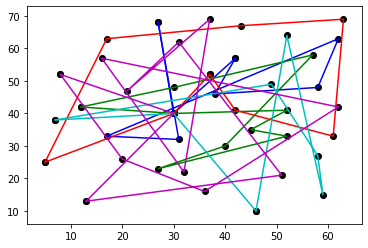

最終解： 817.6856444607105


In [4]:
T = 100  #initiate temperature
Tmin = 10  #minimum value of terperature
Tk = T
alpha=0.5
N=10
K=10

init_sol = get_init_sol1(subtour1(subtourslice1(tour,vehicles)[0],tour)[0])
init_obj = total_distance1(new_coords1(init_sub))
fin_sol = init_sol
fin_sub = init_sub
fin_obj = init_obj
print("初始解：",init_obj)
while Tk > Tmin:
    for k in range(K):
        for n in range(N):
            new_sol = rand(custs, cordsd)[1]
            new_sub = subtour(subtourslice(row_rand,vehicles)[0],row_rand,row_rand_2)[1]
            new_obj = totaltourdistance(subtour(subtourslice(row_rand,vehicles)[0],row_rand,row_rand_2)[0])
            print(new_obj, init_obj)
            if  new_obj <= init_obj:
                init_sol = new_sol
                init_sub = new_sub[:]
                init_obj = new_obj

            else:
                p = np.exp(-((new_obj - init_obj)/Tk))
                if np.random.rand() <= p:
                    init_sol = new_sol
                    init_obj = new_obj
                    init_sub = new_sub[:]

                else:
                    init_sol = init_sol
                    init_obj = init_obj
                    init_sub = init_sub
            if init_obj <= fin_obj:
                fin_sol = init_sol
                fin_sub = init_sub
                fin_obj = init_obj

    Tk = alpha * Tk
plot(xc,yc,xd,yd,fin_sub)
print("最終解：",fin_obj)